<h1> <center> Introducción a estadística </center> </h1>
<p> En esta sección veremos una breve introducción a los principales conceptos de estadística utilizadas a la hora de trabajar en el campo de ciencia de datos, por lo que veremos: </p>
<ul>
    <li> Variables aleatorias discretas y continuas </li>
    <li> Distribuciones de probabilidad </li>
    <li> Muestreos </li>
    <li> Medidas de tendencia central </li>
</ul>
<p> <i> <b>Nota:</b> Esta clase se divide en 2, una breve introducción a algunos conceptos de estadística y probabilidad en Python y un modelo de regresión lineal en R. Su tarea consiste en complementar las clases en Python y en R. </i> </p>
<br/>
<p> Las librerías que utilizaremos en esta sección son las siguientes:</p>

In [2]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import scipy.stats as ss
# Secundarias
import pandas as pd
rd.seed( 30 )

<h2> Conceptos básicos de probabilidad </h2>

<p> En probabilidad tenemos que: </p>
<ul>
    <li> Un <b> espacio muestral </b> es un conjunto de todos los resultados posibles de una variable aleatoria </li>
    <li> Un <b>evento</b> es un subconjuto del espacio muestral, el cual se compone de al menos un elemento de este conjunto </li>
    <li> A partir de la definición clásica, la probabilidad la vamos a entender como la proporción de que el resultado ocurra a largo plazo</li>
</ul>
<h3> Variables aleatorias discretas </h3>

<p> Las variables discretas son aquellas variables que toman tan solo un número finito de resultados dentro de algún intervalo, sus resultados son datos contables, tenemos los siguientes ejemplos </p>


In [26]:
lanzamiento_moneda = ['C','S']
dado = list(range(1,7))
print("Seleccione un evento de la moneda y un evento del dado",
      np.random.choice(lanzamiento_moneda, size=1),
      np.random.choice(dado, size=1))

Seleccione un evento de la moneda y un evento del dado ['S'] [1]


<h3> Distribuciones de probabilidad de variables aleatorias discretas </h3>
La distribución describe la probabilidad de ocurrencia de cada valor de una variable aleatoria

In [27]:
dado = np.asarray(dado)
pdado = [1/6] * 6
cdado = np.cumsum(pdado)

pd.DataFrame(list([dado,pdado,cdado]), index = ['Variable aleatoria','Propabalidad','Probabilidad acumulada'],
            columns = ["Cara1","Cara2","Cara3","Cara4","Cara5","Cara6"])


,Cara1,Cara2,Cara3,Cara4,Cara5,Cara6
Variable aleatoria,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
Propabalidad,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
Probabilidad acumulada,0.166667,0.333333,0.500000,0.666667,0.833333,1.000000


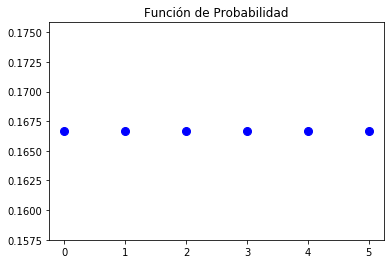

In [56]:
fig, ax = plt.subplots(1, 1)
ax.plot(pdado,'bo',ms=8)
ax.set_title('Función de Probabilidad')
plt.show()

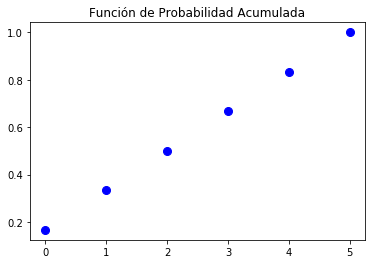

In [57]:
fig, ax = plt.subplots(1, 1)
ax.plot(cdado,'bo',ms=8)
ax.set_title('Función de Probabilidad Acumulada')
plt.show()

<h4> Distribución binomial </h4>
<center>
$X_{i}\sim B_{i}(n,p)$
</center>
<a> Esta distribución es el resultado de contar los éxitos de un experimento que se repite <i> n </i> veces, cuyos resultados posibles son éxito o fracaso, y que son asignadas con una probabilidad </a>
<br/>
<a> La función de probabilidad es:</a>

<center>
$P\left[X=k\right]=\left(\begin{array}{c}
n\\
k
\end{array}\right) p^{k}(1-p)^{n-k}$
</center>

<a> ¿Cuál es la diferencia con una función binomial?


In [4]:
print(ss.binom.pmf(k=5, n=10, p=0.5))
print(ss.binom.pmf(k=list(range(4,8)), n=10, p=0.5).sum())
print(ss.binom.cdf(k=7, n=10, p=0.5) - ss.binom.cdf(k=3, n=10, p=0.5))

0.24609375000000025
0.7734375000000008
0.7734375


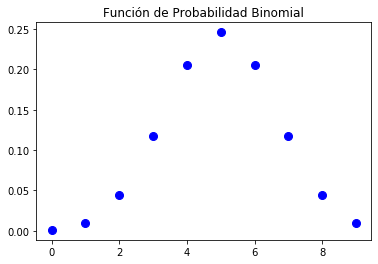

In [58]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    ss.binom.pmf(k=list(range(0,10)),n=10,p=0.5),
    'bo',
    ms=8)
ax.set_title('Función de Probabilidad Binomial')
plt.show()

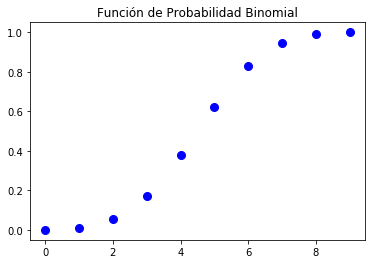

In [60]:
fig, ax = plt.subplots(1, 1)
ax.plot(
    ss.binom.cdf(k=list(range(0,10)),
                 n=10,
                 p=0.5),
    'bo',
    ms=8)
ax.set_title('Función de Probabilidad Acumulada Binomial')
plt.show()

<h4> Distribución Poisson </h4>
<br/>
<p> Es una distribución de probabilidad de una variable aleatoria discreta, que permite conocer la probabilidad de que ocurra un determinado evento un número de <i>"k"</i> veces, en un intervalo determinado</p>
<p> Su función de probabilidad es: </p>

<center>
${\displaystyle P\left[X=k\right]=\frac{\mu^{k}e^{-\mu}}{k!}}$
</center>

0.0033336819930677277 




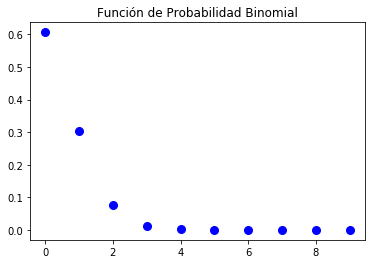

In [59]:
print(ss.poisson.pmf(k=3, mu=0.3),"\n\n")
fig, ax = plt.subplots(1, 1)
ax.plot(
    ss.poisson.pmf(k=list(range(0,10)),
                 mu=0.5),
    'bo',
    ms=8)
ax.set_title('Función de Probabilidad Poisson')
plt.show()

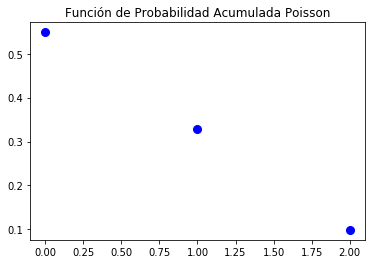

In [62]:
mu = 0.6
fig, ax = plt.subplots(1, 1)
x = np.arange(ss.poisson.ppf(0.01, mu),ss.poisson.ppf(0.99, mu))
ax.plot(x, ss.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.set_title('Función de Probabilidad Acumulada Poisson')
plt.show()

<h3> Variables aleatorias continuas </h3>

<p> Las variables discretas son aquellas variables que toman cualquier valor dentro de algún intervalo, y su función de probabilidad es continua </p>
<br></br>
<h3> Distribuciones de probabilidad de variables aleatorias continuas </h3>
<p>La distribución describe la probabilidad de ocurrencia de cada valor de una variable aleatoria, en este caso en la función de densidad de probabilidad (PDF). Mientras que, la función de distribución de probabilidad acumulativa (CDF) para una variable aleatoria continua se define como en el caso discreto. Por lo tanto, la distribución de probabilidad acumulativa de una variable aleatoria continua establece la probabilidad de que la variable aleatoria sea menor o igual a un valor particular.</p>
<br></br>
<h4> Distribución normal </h4>
Una variables continua aleatoria <i>X</i> sigue una distribución normal de probabilidad con media $\mu$ y varianza $\sigma$

<center>
    $X\sim N(\mu,\sigma)$
</center>

con la función de densidad de probabilidad:
<center>
    ${\displaystyle f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{\left(x-\mu\right)^{2}}{2\sigma^{2}}}}$
</center>



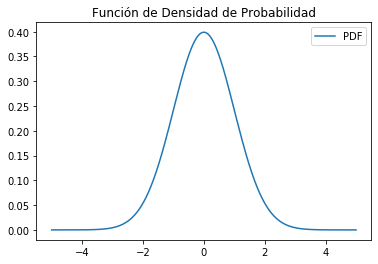

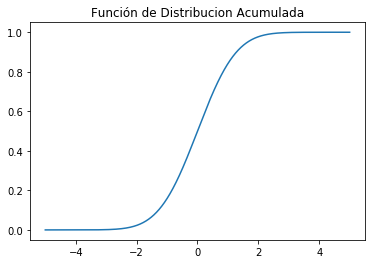

In [6]:
# Generemos una muestra aleatoria con distribución normal
samples = np.random.normal(size=10000)

bins = np.linspace(-5, 5, 10000)
# Con scipy montemos la función de densidad de probabilidad
pdf = ss.norm.pdf(bins)
cdf = ss.norm.cdf(bins)
plt.plot(bins,pdf, label="PDF")
plt.legend()
plt.title("Función de Densidad de Probabilidad")
plt.show()

plt.plot(bins,cdf, label="CDF")
plt.title("Función de Distribucion Acumulada")
plt.show()


In [105]:
list(ss.norm.pdf([-1.96, 0, 1.96]))

[0.058440944333451476, 0.3989422804014327, 0.058440944333451476]

<i> <b> Tarea </b> Defina una PDF normal estandar </i>
<br></br>
<h4> Distribución Chi-cuadrada </h4>
<br/>
Es una distribución de probabilidad aleatoria continua, de 

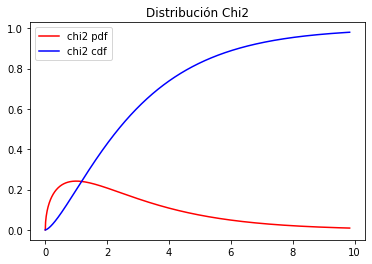

In [139]:
df = 3
x = np.linspace(ss.chi2.ppf(0, df),ss.chi2.ppf(0.98, df), 1000)

plt.plot(x, ss.chi2.pdf(x, df),'r-', label='chi2 pdf')
plt.legend()
plt.title("Distribución Chi2")
plt.plot(x, ss.chi2.cdf(x, df),'b-', label='chi2 cdf')
plt.legend()